In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import plotly.express as px
pd.set_option('display.max_columns', 60)

### Importar o dataframe

In [2]:
df = pd.read_parquet('DadosFinais\df.parquet.gzip', engine='pyarrow')
df.head()

,Data,Demanda,Horário,Dia da Semana,Sul_TempSeco,Sul_Umidade,Sul_Vento,Sul_Nebulosidade,Metro_TempSeco,Metro_Umidade,Metro_Vento,Metro_Nebulosidade,Centro_TempSeco,Centro_Umidade,Centro_Vento,Centro_Nebulosidade,Serra_TempSeco,Serra_Umidade,Serra_Vento,Serra_Nebulosidade,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Feriado
0,2006-01-01,2588.0,00:00:00,6,21.400000,85.000000,3.0,9.000000,23.700000,89.000000,1.300000,10.000000,21.4000,94.000000,2.000000,8.0,17.200000,94.000000,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal
1,2006-01-01,2584.0,00:01:00,6,21.399722,84.995833,3.0,8.993056,23.701528,88.980556,1.298611,9.997222,21.4025,93.990278,1.999028,8.0,17.205556,93.977778,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal
2,2006-01-01,2578.0,00:02:00,6,21.399444,84.991667,3.0,8.986111,23.703056,88.961111,1.297222,9.994444,21.4050,93.980556,1.998056,8.0,17.211111,93.955556,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal
3,2006-01-01,2580.0,00:03:00,6,21.399167,84.987500,3.0,8.979167,23.704583,88.941667,1.295833,9.991667,21.4075,93.970833,1.997083,8.0,17.216667,93.933333,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal
4,2006-01-01,2578.0,00:04:00,6,21.398889,84.983333,3.0,8.972222,23.706111,88.922222,1.294444,9.988889,21.4100,93.961111,1.996111,8.0,17.222222,93.911111,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal


Incluir alguns dados de datas

In [3]:
df['Mês'] = df['Data'].dt.month
df['Ano'] = df['Data'].dt.year
df['Mês_nome'] = df['Data'].dt.month_name()
df['Dia_nome'] = df['Data'].dt.day_name()
df.head()

,Data,Demanda,Horário,Dia da Semana,Sul_TempSeco,Sul_Umidade,Sul_Vento,Sul_Nebulosidade,Metro_TempSeco,Metro_Umidade,Metro_Vento,Metro_Nebulosidade,Centro_TempSeco,Centro_Umidade,Centro_Vento,Centro_Nebulosidade,Serra_TempSeco,Serra_Umidade,Serra_Vento,Serra_Nebulosidade,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Feriado,Mês,Ano,Mês_nome,Dia_nome
0,2006-01-01,2588.0,00:00:00,6,21.400000,85.000000,3.0,9.000000,23.700000,89.000000,1.300000,10.000000,21.4000,94.000000,2.000000,8.0,17.200000,94.000000,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
1,2006-01-01,2584.0,00:01:00,6,21.399722,84.995833,3.0,8.993056,23.701528,88.980556,1.298611,9.997222,21.4025,93.990278,1.999028,8.0,17.205556,93.977778,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
2,2006-01-01,2578.0,00:02:00,6,21.399444,84.991667,3.0,8.986111,23.703056,88.961111,1.297222,9.994444,21.4050,93.980556,1.998056,8.0,17.211111,93.955556,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
3,2006-01-01,2580.0,00:03:00,6,21.399167,84.987500,3.0,8.979167,23.704583,88.941667,1.295833,9.991667,21.4075,93.970833,1.997083,8.0,17.216667,93.933333,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday
4,2006-01-01,2578.0,00:04:00,6,21.398889,84.983333,3.0,8.972222,23.706111,88.922222,1.294444,9.988889,21.4100,93.961111,1.996111,8.0,17.222222,93.911111,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,January,Sunday


### Verificação e tratamento de outliers e valores errados na Demanda

<AxesSubplot:xlabel='Demanda'>

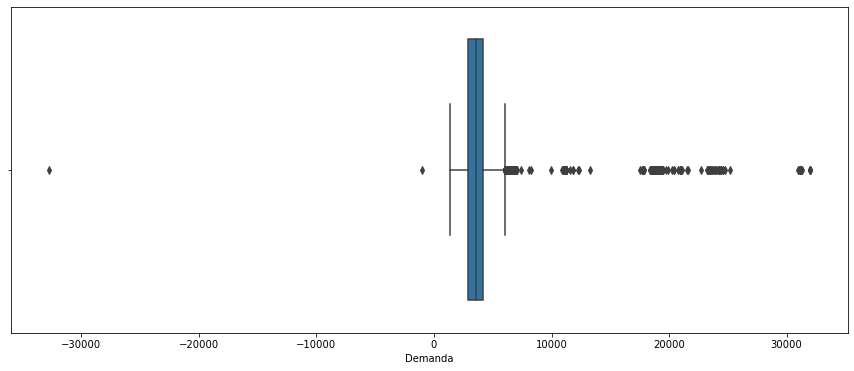

In [4]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df["Demanda"])
#plt.xlim(0,6500)

É possível verificar que tem valores estranhos, como demandas negativas e extremamente altas. Os valores abaixos de 1500 e acima de 7000 e serão excluídos. Esses são os valores próximos aos históricos de maior e menor demanda no RS nos últimos anos.

In [5]:
df_cleaned = df[(df['Demanda']>1400) & (df['Demanda']<7000)]

<AxesSubplot:xlabel='Demanda'>

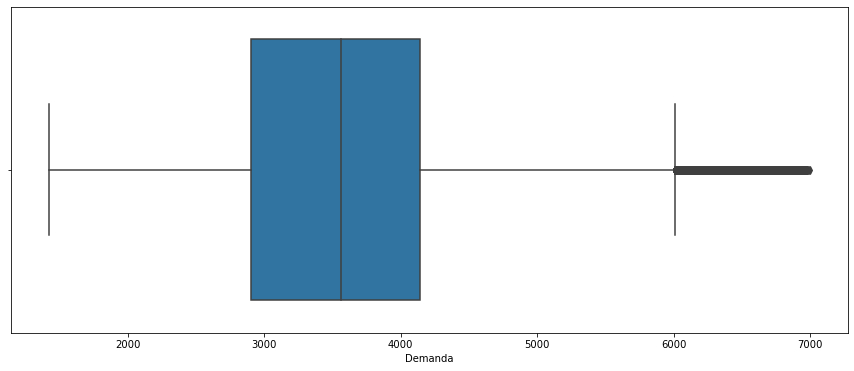

In [6]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_cleaned["Demanda"])
#plt.xlim(0,6500)

In [7]:
print('Quantidade de dados excluídos:',len(df)-len(df_cleaned))

Quantidade de dados excluídos: 302


### EDA

**Boxplot por feriados**

<AxesSubplot:xlabel='Demanda', ylabel='Feriado'>

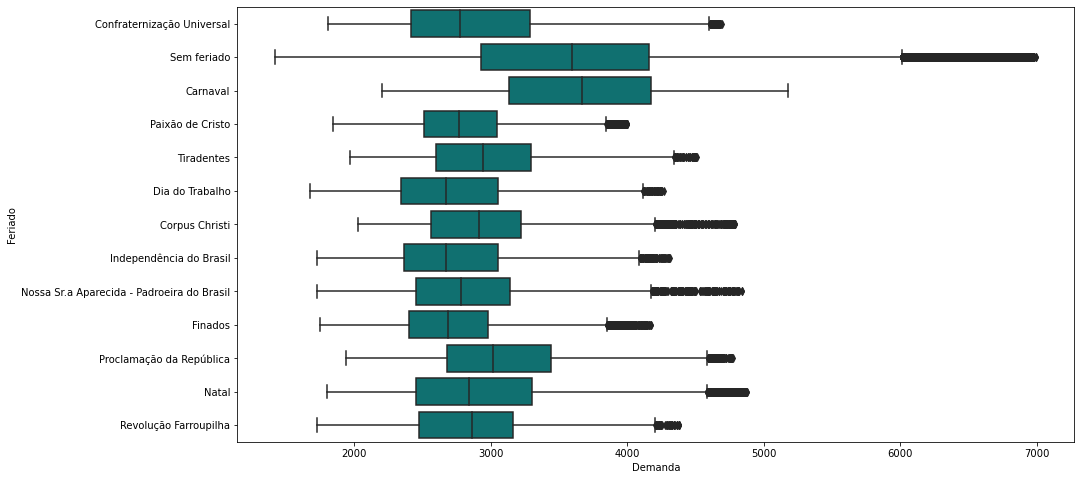

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_cleaned["Demanda"], y= df_cleaned['Feriado'], color = 'teal')

É possível perceber que a média de demanda nos dias sem feriados é maior do que nos dias com feriados, com exceção do carnaval. 

**Boxplot por dia**

<AxesSubplot:xlabel='Demanda', ylabel='Dia_nome'>

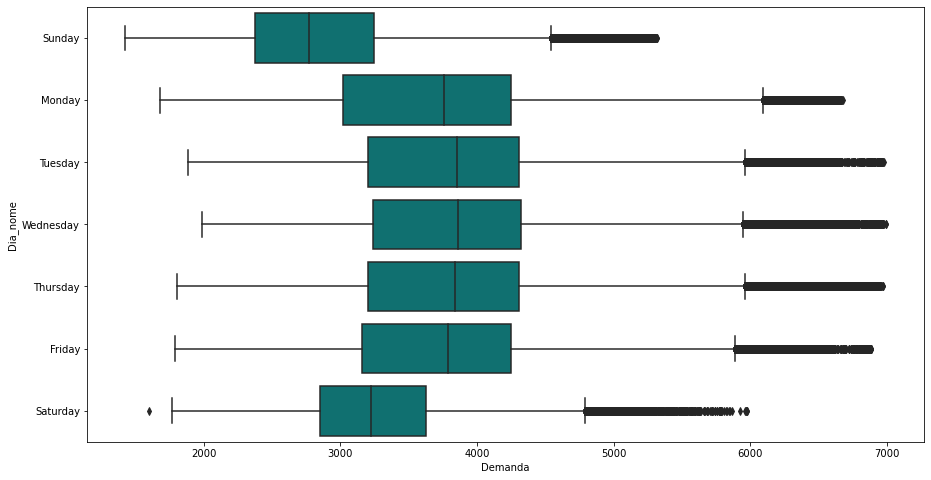

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_cleaned["Demanda"], y= df_cleaned['Dia_nome'], color='teal')

Incluindo os turnos

In [10]:
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(6,0)) & (df_cleaned['Horário'] >= datetime.time(0,0)), 'Turno'] = 'Madrugada'  
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(12,0)) & (df_cleaned['Horário'] > datetime.time(6,0)), 'Turno'] = 'Manhã'
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(18,0)) & (df_cleaned['Horário'] > datetime.time(12,0)), 'Turno'] = 'Tarde'
df_cleaned.loc[(df_cleaned['Horário'] <= datetime.time(23,59)) & (df_cleaned['Horário'] > datetime.time(18,0)), 'Turno'] = 'Noite'

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**Boxplot por turno**

<AxesSubplot:xlabel='Demanda', ylabel='Turno'>

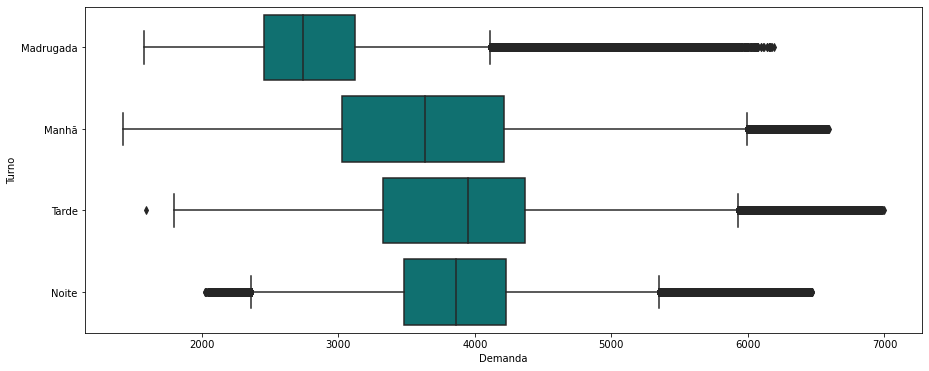

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_cleaned["Demanda"], y= df_cleaned['Turno'], color='teal')


#### Gráfico Diário

In [18]:
#Foi usado um dia como exemplo
px.line( df_cleaned.loc[df_cleaned['Data']=='2019-01-08'], x="Horário", y="Demanda", title='Demanda Diária')

### Média, máxima e mínima por ano

In [19]:
df_grouped_by_year = df_cleaned.groupby('Ano')['Demanda'].agg(['mean','min', 'max']).reset_index() 

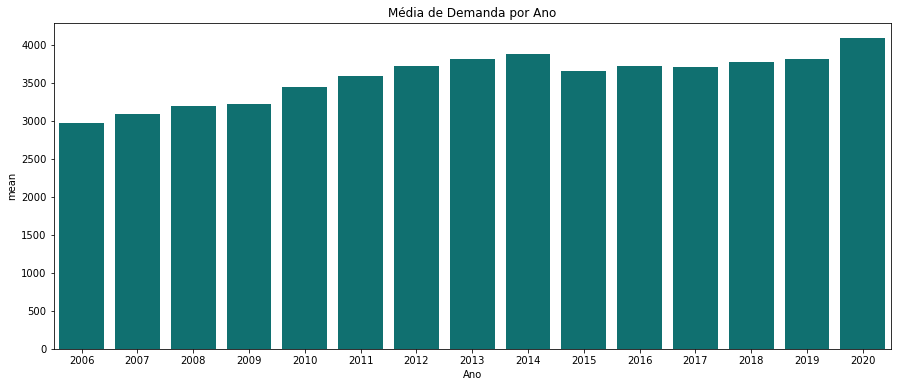

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x='Ano', y='mean', data=df_grouped_by_year, color='teal')
plt.title('Média de Demanda por Ano')
plt.show()

Text(0.5, 1.0, 'Máxima de Demanda por Ano')

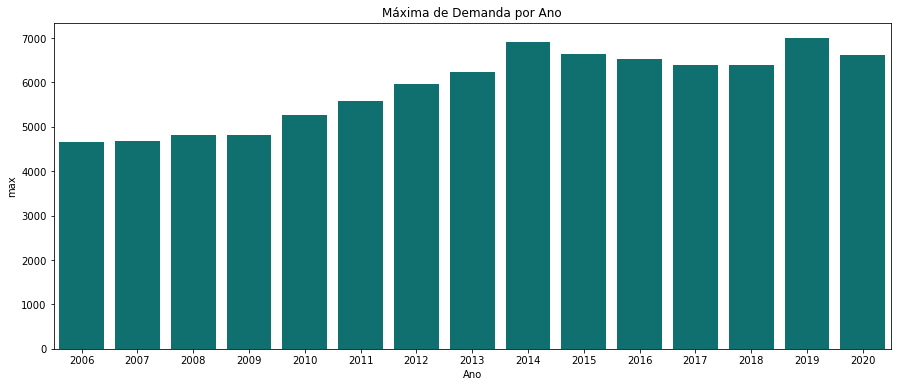

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x='Ano', y='max', data=df_grouped_by_year, color='teal')
plt.title('Máxima de Demanda por Ano')

Text(0.5, 1.0, 'Mínima de Demanda por Ano')

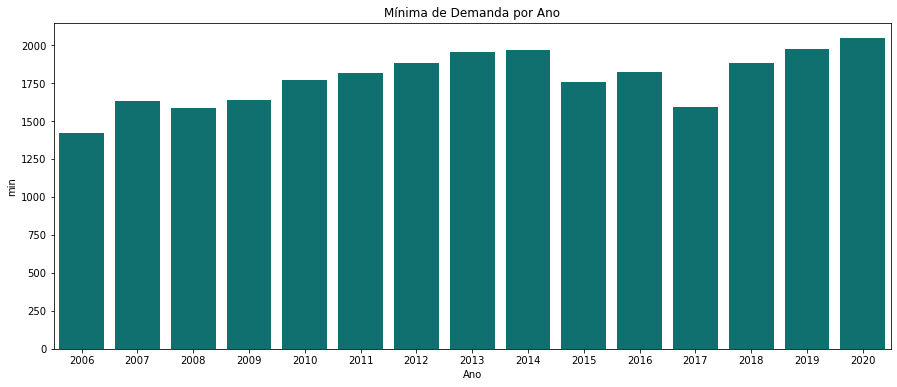

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='Ano', y='min', data=df_grouped_by_year, color='teal')
plt.title('Mínima de Demanda por Ano')

### Agrupado por mês

In [23]:
df_grouped_by_month = df_cleaned.groupby('Mês_nome')['Demanda', 'Sul_TempSeco'].agg(['mean','min', 'max']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



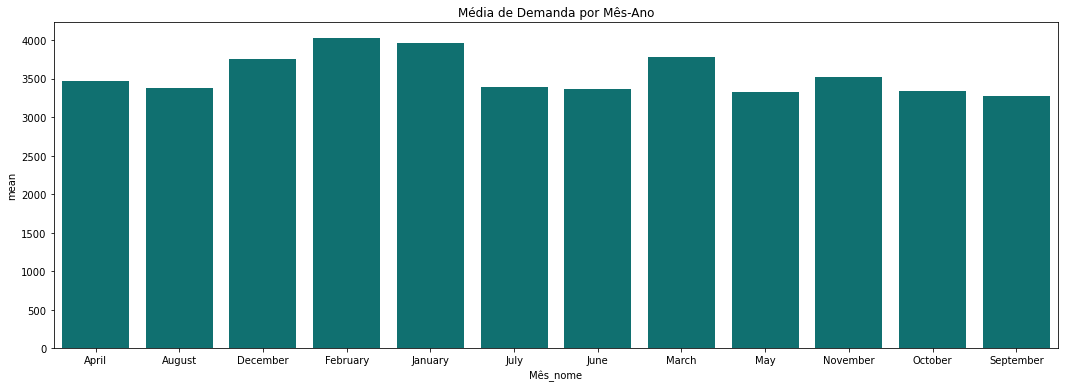

In [24]:
plt.figure(figsize=(18,6))
sns.barplot(x='Mês_nome', y=df_grouped_by_month['Demanda']['mean'], data=df_grouped_by_month, color='teal')
plt.title('Média de Demanda por Mês-Ano')
plt.show()

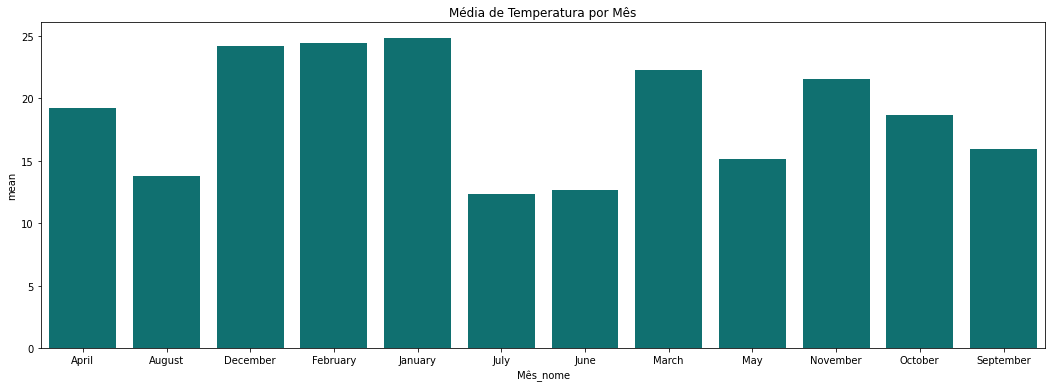

In [25]:
plt.figure(figsize=(18,6))
sns.barplot(x='Mês_nome', y=df_grouped_by_month['Sul_TempSeco']['mean'], data=df_grouped_by_month, color='teal')
plt.title('Média de Temperatura por Mês')
plt.show()

### Média, mínima e máxima por dia

In [26]:
df_grouped_by_date = df_cleaned.groupby('Data')['Demanda'].agg(['mean','min', 'max']).reset_index() 
df_grouped_by_date.head()

,Data,mean,min,max
0,2006-01-01,2277.530556,1806.0,3302.0
1,2006-01-02,3045.465278,2274.0,3631.0
2,2006-01-03,3213.102778,2560.0,3761.0
3,2006-01-04,3256.781944,2549.0,3856.0
4,2006-01-05,3314.315900,2649.0,3910.0


In [27]:
df_grouped_by_date = df_cleaned.groupby('Data')['Demanda'].agg(['mean','min', 'max']).reset_index() 
df_grouped_by_date.head()

,Data,mean,min,max
0,2006-01-01,2277.530556,1806.0,3302.0
1,2006-01-02,3045.465278,2274.0,3631.0
2,2006-01-03,3213.102778,2560.0,3761.0
3,2006-01-04,3256.781944,2549.0,3856.0
4,2006-01-05,3314.315900,2649.0,3910.0


In [28]:
df_grouped_by_date.head(10)

,Data,mean,min,max
0,2006-01-01,2277.530556,1806.0,3302.0
1,2006-01-02,3045.465278,2274.0,3631.0
2,2006-01-03,3213.102778,2560.0,3761.0
3,2006-01-04,3256.781944,2549.0,3856.0
4,2006-01-05,3314.315900,2649.0,3910.0
5,2006-01-06,3397.077156,2653.0,3981.0
6,2006-01-07,3153.916667,2612.0,3955.0
7,2006-01-08,2921.569444,2497.0,3524.0
8,2006-01-09,3551.587500,2741.0,4345.0
9,2006-01-10,3697.296528,2972.0,4451.0


**Gráfico da média diária ao longo do tempo**

<AxesSubplot:xlabel='Data', ylabel='mean'>

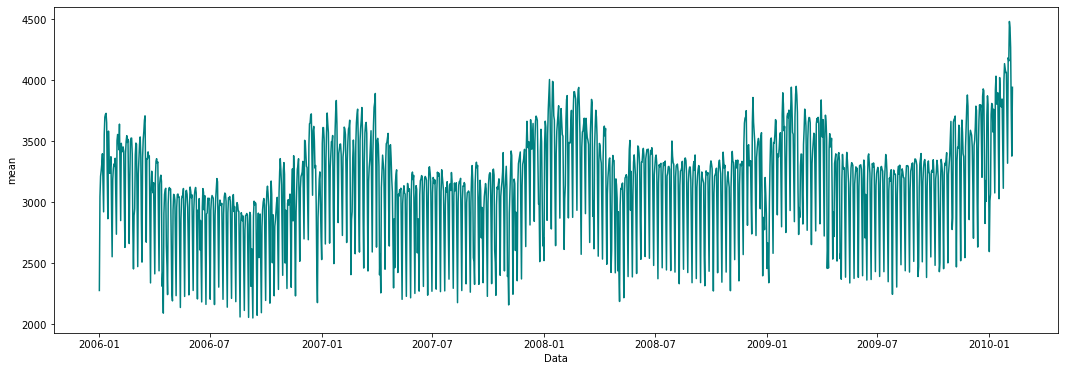

In [89]:
plt.figure(figsize=(18,6))
#df_grouped_idx = df_grouped_by_date.set_index('Data')
sns.lineplot(y=df_grouped_by_date['mean'][:1500], x = df_grouped_by_date['Data'][:1500], color='teal')

**Para verificar a correlação, faremos algumas modificações no dataset. Transformar os dados categóricos em dummies**

In [30]:
# Carrega o último dataframe
df = df_cleaned

In [31]:
# Tranformar os feriados para com ou sem feriado
df['Feriado_cod'] = df['Feriado']
df['Feriado_cod'] = df['Feriado_cod'].apply(lambda x: 'Sem Feriado' if x=='Sem feriado' else 'Com Feriado')

In [32]:
# Dummies para feriados
df = pd.get_dummies(df, columns=['Feriado_cod'], prefix='', drop_first=False, prefix_sep='')

In [33]:
# Tranformar os dias para dia de semana ou fim de semana
df['Categoria_dia'] = df['Dia_nome']
df['Categoria_dia'] = df['Categoria_dia'].apply(lambda x: 'Fim de Semana' if (x=='Sunday' or x=='Saturday') else 'Dia de Semana')

In [34]:
# Dummies para dias da semana e categorias dias
df = pd.get_dummies(df, columns=['Dia_nome'], prefix='', drop_first=False, prefix_sep='')
df = pd.get_dummies(df, columns=['Categoria_dia'], prefix='', drop_first=False, prefix_sep='')

In [35]:
# Dummies para os meses
df = pd.get_dummies(df, columns=['Mês_nome'], prefix='', drop_first=False, prefix_sep='')

In [36]:
df.head()

,Data,Demanda,Horário,Dia da Semana,Sul_TempSeco,Sul_Umidade,Sul_Vento,Sul_Nebulosidade,Metro_TempSeco,Metro_Umidade,Metro_Vento,Metro_Nebulosidade,Centro_TempSeco,Centro_Umidade,Centro_Vento,Centro_Nebulosidade,Serra_TempSeco,Serra_Umidade,Serra_Vento,Serra_Nebulosidade,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Feriado,Mês,Ano,Turno,Com Feriado,Sem Feriado,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Dia de Semana,Fim de Semana,April,August,December,February,January,July,June,March,May,November,October,September
0,2006-01-01,2588.0,00:00:00,6,21.400000,85.000000,3.0,9.000000,23.700000,89.000000,1.300000,10.000000,21.4000,94.000000,2.000000,8.0,17.200000,94.000000,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2006-01-01,2584.0,00:01:00,6,21.399722,84.995833,3.0,8.993056,23.701528,88.980556,1.298611,9.997222,21.4025,93.990278,1.999028,8.0,17.205556,93.977778,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2006-01-01,2578.0,00:02:00,6,21.399444,84.991667,3.0,8.986111,23.703056,88.961111,1.297222,9.994444,21.4050,93.980556,1.998056,8.0,17.211111,93.955556,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2006-01-01,2580.0,00:03:00,6,21.399167,84.987500,3.0,8.979167,23.704583,88.941667,1.295833,9.991667,21.4075,93.970833,1.997083,8.0,17.216667,93.933333,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2006-01-01,2578.0,00:04:00,6,21.398889,84.983333,3.0,8.972222,23.706111,88.922222,1.294444,9.988889,21.4100,93.961111,1.996111,8.0,17.222222,93.911111,1.0,8.0,108.55,91.702366,98.900273,10530809,Confraternização Universal,1,2006,Madrugada,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


### Correlação de todos as variáveis 

In [37]:
df.columns

Index(['Data', 'Demanda', 'Horário', 'Dia da Semana', 'Sul_TempSeco',
       'Sul_Umidade', 'Sul_Vento', 'Sul_Nebulosidade', 'Metro_TempSeco',
       'Metro_Umidade', 'Metro_Vento', 'Metro_Nebulosidade', 'Centro_TempSeco',
       'Centro_Umidade', 'Centro_Vento', 'Centro_Nebulosidade',
       'Serra_TempSeco', 'Serra_Umidade', 'Serra_Vento', 'Serra_Nebulosidade',
       'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal', 'População',
       'Feriado', 'Mês', 'Ano', 'Turno', 'Com Feriado', 'Sem Feriado',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Dia de Semana', 'Fim de Semana', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [38]:
df_cor_1 = df[['Demanda', 'Sul_TempSeco', 'Sul_Umidade', 'Sul_Vento', 'Sul_Nebulosidade', 'Metro_TempSeco', 'Metro_Umidade',
       'Metro_Vento', 'Metro_Nebulosidade', 'Centro_TempSeco', 'Centro_Umidade', 'Centro_Vento', 'Centro_Nebulosidade',
       'Serra_TempSeco', 'Serra_Umidade', 'Serra_Vento', 'Serra_Nebulosidade']]

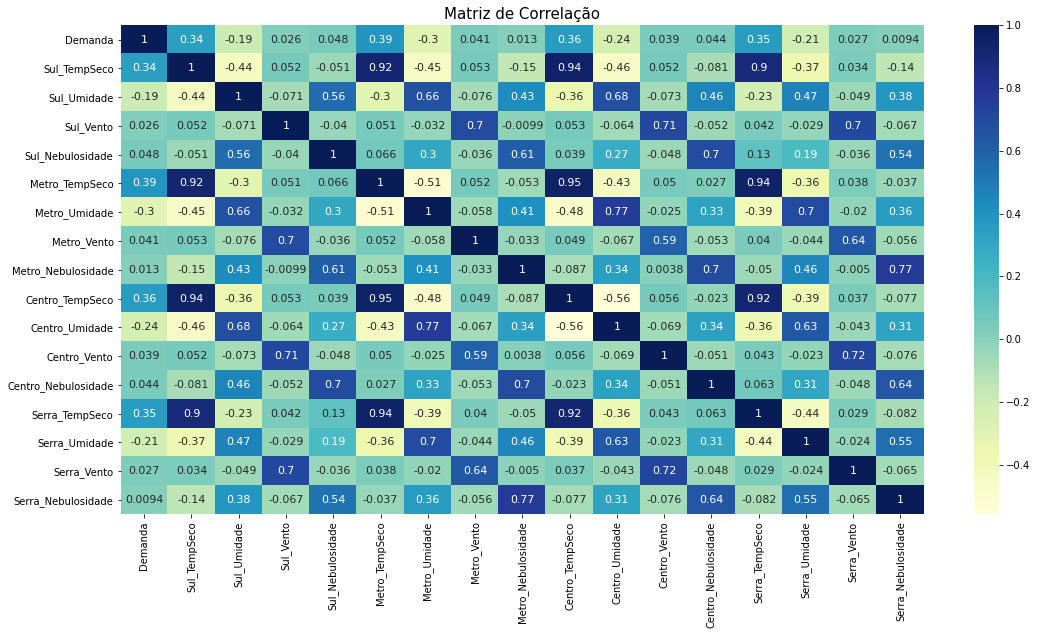

In [39]:
ax = plt.figure(figsize=(18,9));
corr1 = df_cor_1.corr()
ax = sns.heatmap(corr1, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação', fontsize=15);

In [40]:
df_cor_2 = df[['Demanda', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Com Feriado','Friday', 'Monday', 
               'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Dia de Semana','April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September']]               

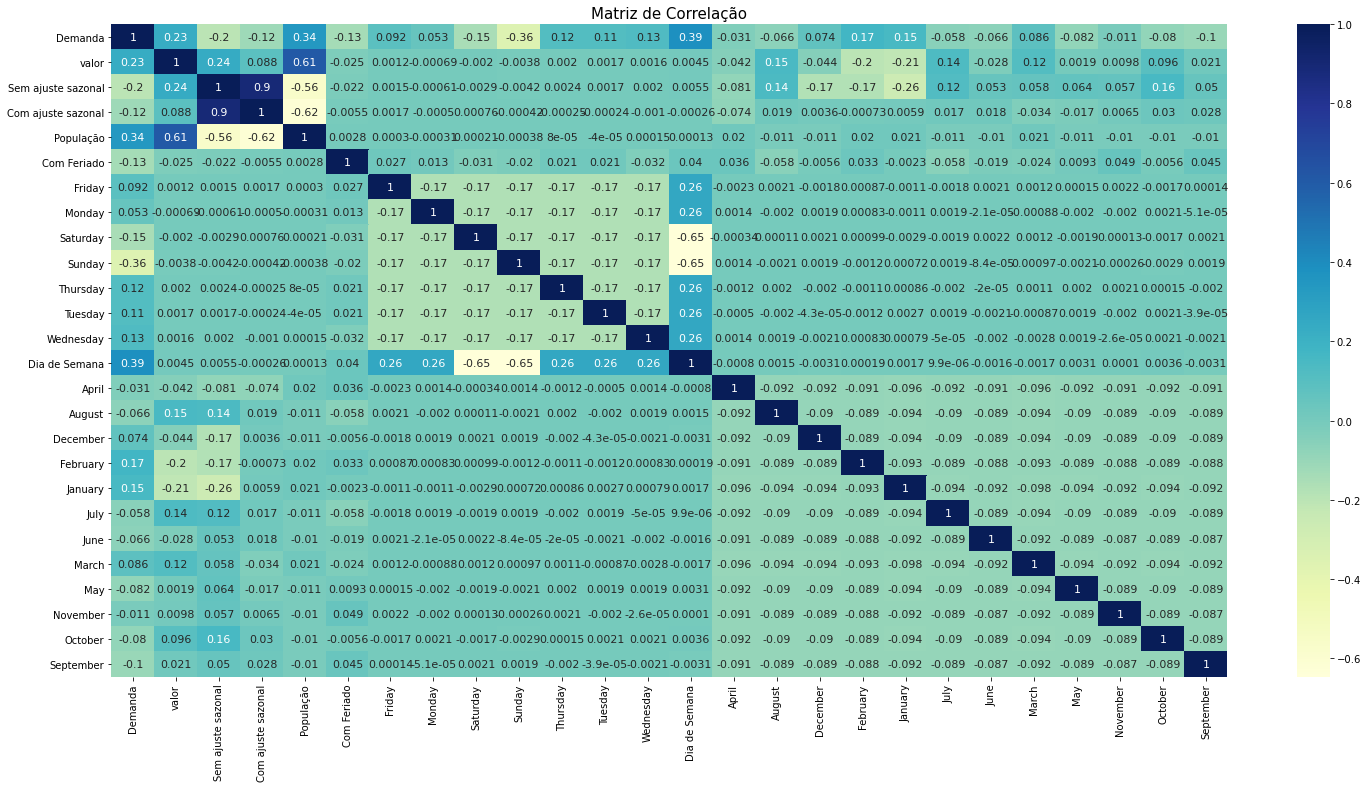

In [41]:
ax = plt.figure(figsize=(25,12));
corr2 = df_cor_2.corr()
ax = sns.heatmap(corr2, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação', fontsize=15);

### Vamos tirar os dados de vento e nebulosidade

In [42]:
df_2 = df.drop(columns=['Sul_Vento', 'Sul_Nebulosidade', 'Metro_Vento', 'Metro_Nebulosidade', 'Centro_Vento', 
                        'Centro_Nebulosidade','Serra_Vento', 'Serra_Nebulosidade','Sem Feriado','Fim de Semana', 'Monday',
                         'Tuesday', 'Wednesday', 'Thursday', 'Friday' ])

In [43]:
df_2.columns

Index(['Data', 'Demanda', 'Horário', 'Dia da Semana', 'Sul_TempSeco',
       'Sul_Umidade', 'Metro_TempSeco', 'Metro_Umidade', 'Centro_TempSeco',
       'Centro_Umidade', 'Serra_TempSeco', 'Serra_Umidade', 'valor',
       'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Feriado',
       'Mês', 'Ano', 'Turno', 'Com Feriado', 'Saturday', 'Sunday',
       'Dia de Semana', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [44]:
df_cor_3 = df_2[['Demanda', 'Sul_TempSeco', 'Sul_Umidade','Metro_TempSeco', 'Metro_Umidade', 'Centro_TempSeco', 
                 'Centro_Umidade','Serra_TempSeco', 'Serra_Umidade', 'valor','Sem ajuste sazonal','Com ajuste sazonal', 
                 'População', 'Com Feriado','Saturday','Sunday','Dia de Semana','April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September' ]]

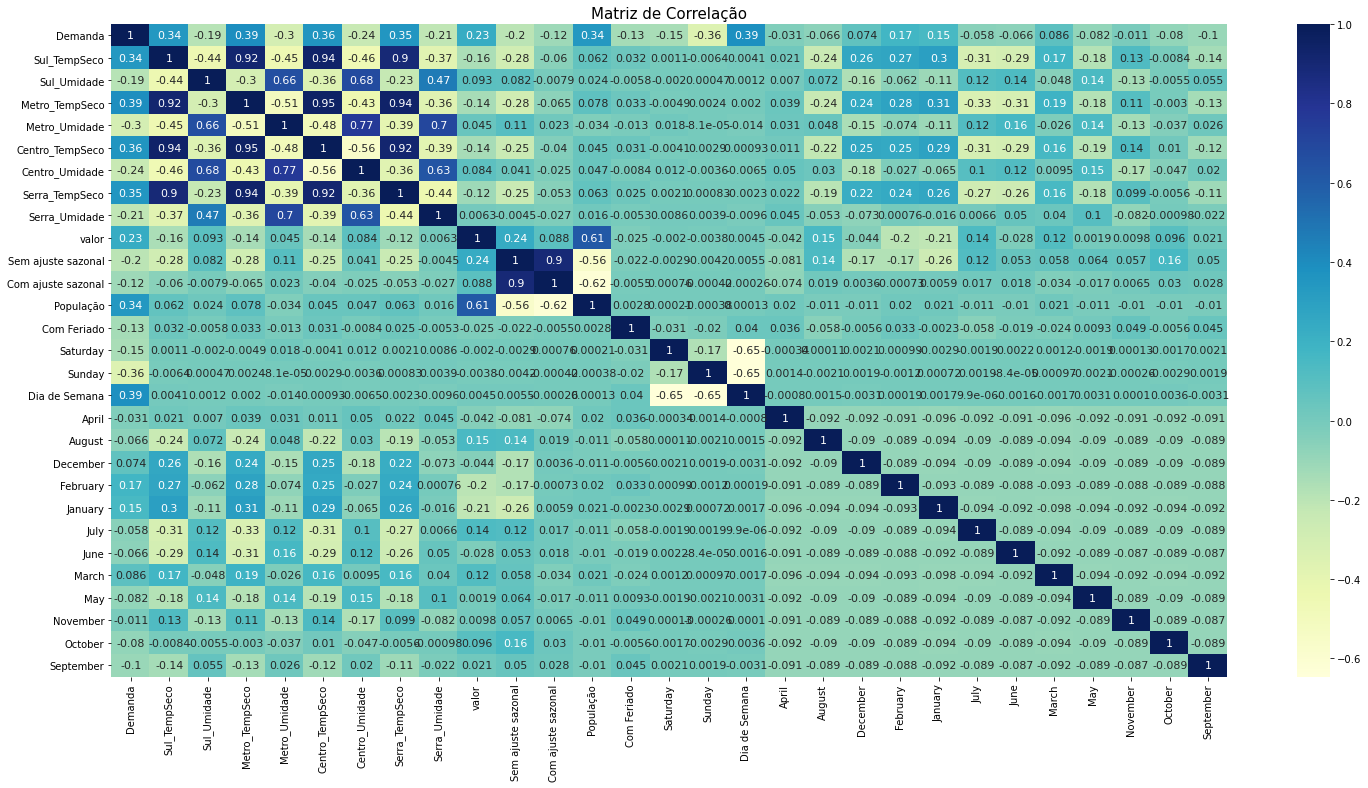

In [45]:
ax = plt.figure(figsize=(25,12));
corr3 = df_cor_3.corr()
ax = sns.heatmap(corr3, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação', fontsize=15);

**Dataframe df_2 apenas com as features que parecem ter correlação com a demanda**

**Vamos criar um novo dataset com a média dos dados climatológicos para o estado para verificar se os resultados ficam piores na hora da modelagem**

In [46]:
df_3 = df_2[['Data', 'Demanda', 'Horário', 'Sul_TempSeco', 'Sul_Umidade',
       'Metro_TempSeco', 'Metro_Umidade', 'Centro_TempSeco', 'Centro_Umidade',
       'Serra_TempSeco', 'Serra_Umidade', 'Dia da Semana', 'valor',
       'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Feriado',
       'Ano', 'Turno', 'Com Feriado', 'Saturday', 'Sunday',
       'Dia de Semana','April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']]

In [47]:
df_3['Média Temperatura'] = (df_3['Sul_TempSeco']+df_3['Metro_TempSeco']+df_3['Serra_TempSeco']+df_3['Centro_TempSeco'])/4
df_3['Média Umidade'] = (df_3['Sul_Umidade']+df_3['Metro_Umidade']+df_3['Serra_Umidade']+df_3['Centro_Umidade'])/4

In [48]:
df_3 = df_3.drop(columns=['Sul_TempSeco', 'Metro_TempSeco', 'Serra_TempSeco', 'Centro_TempSeco','Sul_Umidade',
                        'Metro_Umidade', 'Serra_Umidade', 'Centro_Umidade'])

In [49]:
df_3.columns

Index(['Data', 'Demanda', 'Horário', 'Dia da Semana', 'valor',
       'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Feriado',
       'Ano', 'Turno', 'Com Feriado', 'Saturday', 'Sunday', 'Dia de Semana',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Média Temperatura',
       'Média Umidade'],
      dtype='object')

In [50]:
df_cor_4 = df_3[['Demanda', 'valor','Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Com Feriado', 'Saturday', 
                 'Sunday', 'Dia de Semana', 'Média Temperatura','Média Umidade','April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']]

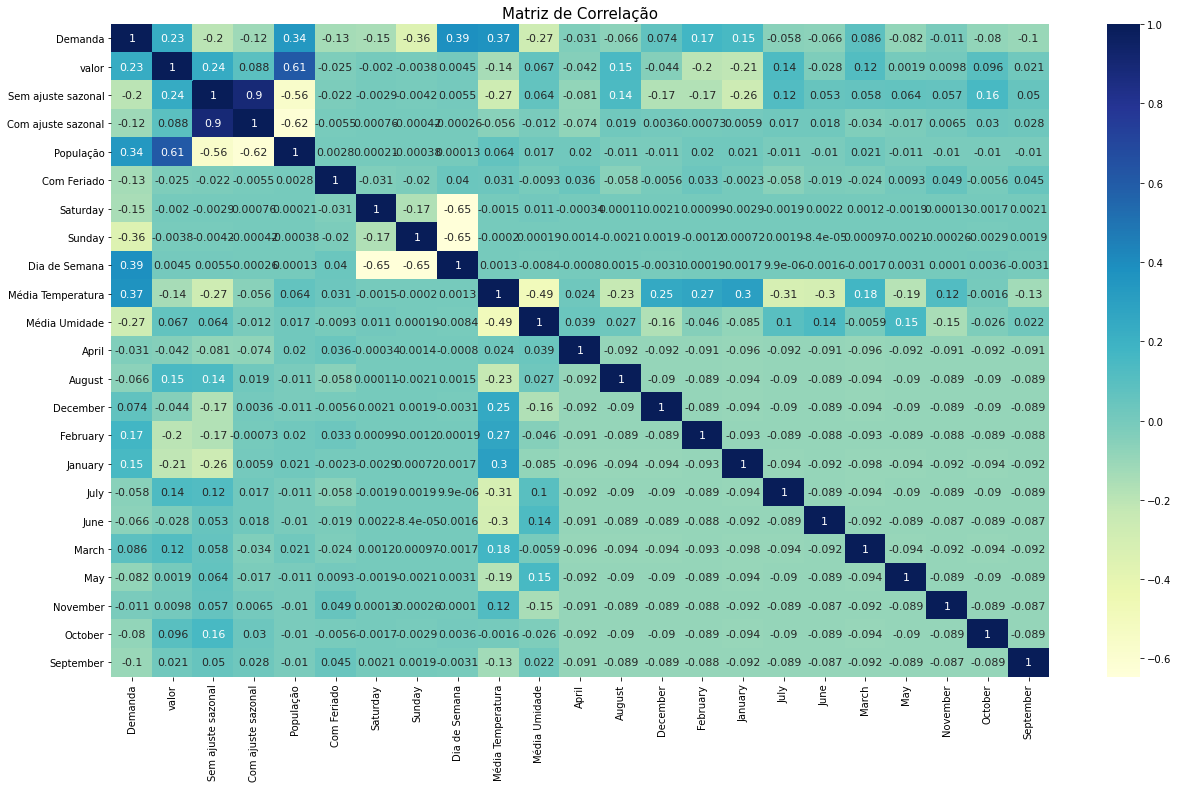

In [51]:
ax = plt.figure(figsize=(21,12));
corr4 = df_cor_4.corr()
ax = sns.heatmap(corr4, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação', fontsize=15);

**Correlação das features com os dados de demanda média, mínima e máxima do dia**

In [52]:
df_2_grouped_by_date_max = df_2.groupby('Data')['Demanda','Sul_TempSeco','Sul_Umidade', 'Metro_TempSeco', 'Metro_Umidade', 'Centro_TempSeco', 'Centro_Umidade',
       'Serra_TempSeco', 'Serra_Umidade', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Com Feriado','Sunday',
       'Saturday','Dia de Semana','April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'].agg(['max']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [53]:
df_2_grouped_by_date_min = df_2.groupby('Data')['Demanda','Sul_TempSeco','Sul_Umidade', 'Metro_TempSeco', 'Metro_Umidade', 
                                                'Centro_TempSeco', 'Centro_Umidade', 'Serra_TempSeco', 'Serra_Umidade'
                                               ].agg(['min']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [54]:
df_2_grouped_by_date_mean = df_2.groupby('Data')['Demanda','Sul_TempSeco','Sul_Umidade', 'Metro_TempSeco', 'Metro_Umidade', 
                                                'Centro_TempSeco', 'Centro_Umidade', 'Serra_TempSeco', 'Serra_Umidade'
                                               ].agg(['mean']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
df_2_grouped_by_date_max.columns = df_2_grouped_by_date_max.columns.get_level_values(0)
df_2_grouped_by_date_min.columns = df_2_grouped_by_date_min.columns.get_level_values(0)
df_2_grouped_by_date_mean.columns = df_2_grouped_by_date_mean.columns.get_level_values(0)

In [56]:
df_2_grouped_by_date_max.columns

Index(['Data', 'Demanda', 'Sul_TempSeco', 'Sul_Umidade', 'Metro_TempSeco',
       'Metro_Umidade', 'Centro_TempSeco', 'Centro_Umidade', 'Serra_TempSeco',
       'Serra_Umidade', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal',
       'População', 'Com Feriado', 'Sunday', 'Saturday', 'Dia de Semana',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [57]:
df_2_grouped_by_date_max.rename(columns={"Demanda": "Demanda_Max", 'Sul_TempSeco': 'Sul_Temp_Max', 'Sul_Umidade': 'Sul_Umidade_Max',
                               'Metro_TempSeco': 'Metro_Temp_Max','Metro_Umidade': 'Metro_Umidade_Max', 'Centro_TempSeco':
                                'Centro_Temp_Max', 'Centro_Umidade': 'Centro_Umidade_Max', 'Serra_TempSeco':'Serra_Temp_Max',
                               'Serra_Umidade': 'Serra_Umidade_Max'}, inplace=True)

In [58]:
df_2_grouped_by_date_min.rename(columns={"Demanda": "Demanda_Min", 'Sul_TempSeco': 'Sul_Temp_Min', 'Sul_Umidade': 'Sul_Umidade_Min',
                               'Metro_TempSeco': 'Metro_Temp_Min','Metro_Umidade': 'Metro_Umidade_Min', 'Centro_TempSeco':
                                'Centro_Temp_Min', 'Centro_Umidade': 'Centro_Umidade_Min', 'Serra_TempSeco':'Serra_Temp_Min',
                               'Serra_Umidade': 'Serra_Umidade_Min'}, inplace=True)

In [59]:
df_2_grouped_by_date_mean.rename(columns={"Demanda": "Demanda_Med", 'Sul_TempSeco': 'Sul_Temp_Med', 'Sul_Umidade': 'Sul_Umidade_Med',
                               'Metro_TempSeco': 'Metro_Temp_Med','Metro_Umidade': 'Metro_Umidade_Med', 'Centro_TempSeco':
                                'Centro_Temp_Med', 'Centro_Umidade': 'Centro_Umidade_Med', 'Serra_TempSeco':'Serra_Temp_Med',
                               'Serra_Umidade': 'Serra_Umidade_Med'}, inplace=True)

In [60]:
df_4 = df_2_grouped_by_date_max.merge(df_2_grouped_by_date_min, how='left', on = ['Data'])

In [61]:
df_4 = df_4.merge(df_2_grouped_by_date_mean, how='left', on = ['Data'])

In [62]:
df_4.head()

,Data,Demanda_Max,Sul_Temp_Max,Sul_Umidade_Max,Metro_Temp_Max,Metro_Umidade_Max,Centro_Temp_Max,Centro_Umidade_Max,Serra_Temp_Max,Serra_Umidade_Max,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Com Feriado,Sunday,Saturday,Dia de Semana,April,August,December,February,January,July,June,March,May,November,October,September,Demanda_Min,Sul_Temp_Min,Sul_Umidade_Min,Metro_Temp_Min,Metro_Umidade_Min,Centro_Temp_Min,Centro_Umidade_Min,Serra_Temp_Min,Serra_Umidade_Min,Demanda_Med,Sul_Temp_Med,Sul_Umidade_Med,Metro_Temp_Med,Metro_Umidade_Med,Centro_Temp_Med,Centro_Umidade_Med,Serra_Temp_Med,Serra_Umidade_Med
0,2006-01-01,3302.0,27.2,85.000,29.4,89.0,29.4,94.000000,23.2,94.000000,108.55,91.702366,98.900273,10530809,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1806.0,21.200000,58.000000,23.700000,64.0,21.400000,64.0,17.200000,77.0,2277.530556,23.086632,75.379861,25.674618,76.502778,24.623472,81.631250,20.598889,83.500694
1,2006-01-02,3631.0,30.0,84.000,27.6,93.0,30.2,86.000000,22.0,95.963889,108.55,91.702366,98.900273,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2274.0,20.000000,47.000000,23.300000,71.0,23.200000,59.0,18.808889,83.0,3045.465278,24.062222,68.503819,24.812847,83.000000,25.800347,76.247917,20.600556,88.373611
2,2006-01-03,3761.0,29.4,76.925,27.6,81.0,28.2,88.919444,21.2,96.000000,108.55,91.702366,98.900273,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2560.0,20.026111,50.000000,22.813333,55.0,22.017222,60.0,18.008889,79.0,3213.102778,24.689132,61.494097,25.037847,72.500347,24.625972,78.872569,19.525278,86.253819
3,2006-01-04,3856.0,28.0,77.000,29.7,80.0,31.8,89.000000,26.0,85.000000,108.55,91.702366,98.900273,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2549.0,20.000000,53.002778,22.619722,53.0,22.000000,52.0,18.000000,40.0,3256.781944,22.773889,67.508333,24.800069,70.625000,26.098542,71.257986,21.648958,63.753819
4,2006-01-05,3910.0,29.0,64.000,28.4,80.0,30.4,86.000000,25.2,84.941667,108.55,91.702366,98.900273,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2649.0,22.200000,43.000000,21.519167,54.0,22.200000,56.0,19.017222,64.0,3314.315900,24.385114,55.003458,24.294935,65.483758,25.477662,71.757555,21.732956,76.223588


In [63]:
df_4.columns

Index(['Data', 'Demanda_Max', 'Sul_Temp_Max', 'Sul_Umidade_Max',
       'Metro_Temp_Max', 'Metro_Umidade_Max', 'Centro_Temp_Max',
       'Centro_Umidade_Max', 'Serra_Temp_Max', 'Serra_Umidade_Max', 'valor',
       'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Com Feriado',
       'Sunday', 'Saturday', 'Dia de Semana', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Demanda_Min', 'Sul_Temp_Min',
       'Sul_Umidade_Min', 'Metro_Temp_Min', 'Metro_Umidade_Min',
       'Centro_Temp_Min', 'Centro_Umidade_Min', 'Serra_Temp_Min',
       'Serra_Umidade_Min', 'Demanda_Med', 'Sul_Temp_Med', 'Sul_Umidade_Med',
       'Metro_Temp_Med', 'Metro_Umidade_Med', 'Centro_Temp_Med',
       'Centro_Umidade_Med', 'Serra_Temp_Med', 'Serra_Umidade_Med'],
      dtype='object')

In [64]:
df_cor_5 = df_4[['Demanda_Max', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal','População', 'Com Feriado', 'Sunday', 'Saturday', 'Dia de Semana',
            'Sul_Temp_Max', 'Sul_Umidade_Max', 'Metro_Temp_Max', 'Metro_Umidade_Max', 'Centro_Temp_Max', 'Centro_Umidade_Max',
                 'Serra_Temp_Max', 'Serra_Umidade_Max',
         'Sul_Temp_Min',
       'Sul_Umidade_Min', 'Metro_Temp_Min', 'Metro_Umidade_Min',
       'Centro_Temp_Min', 'Centro_Umidade_Min', 'Serra_Temp_Min',
       'Serra_Umidade_Min','Sul_Temp_Med', 'Sul_Umidade_Med',
       'Metro_Temp_Med', 'Metro_Umidade_Med', 'Centro_Temp_Med',
       'Centro_Umidade_Med', 'Serra_Temp_Med', 'Serra_Umidade_Med', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September']]

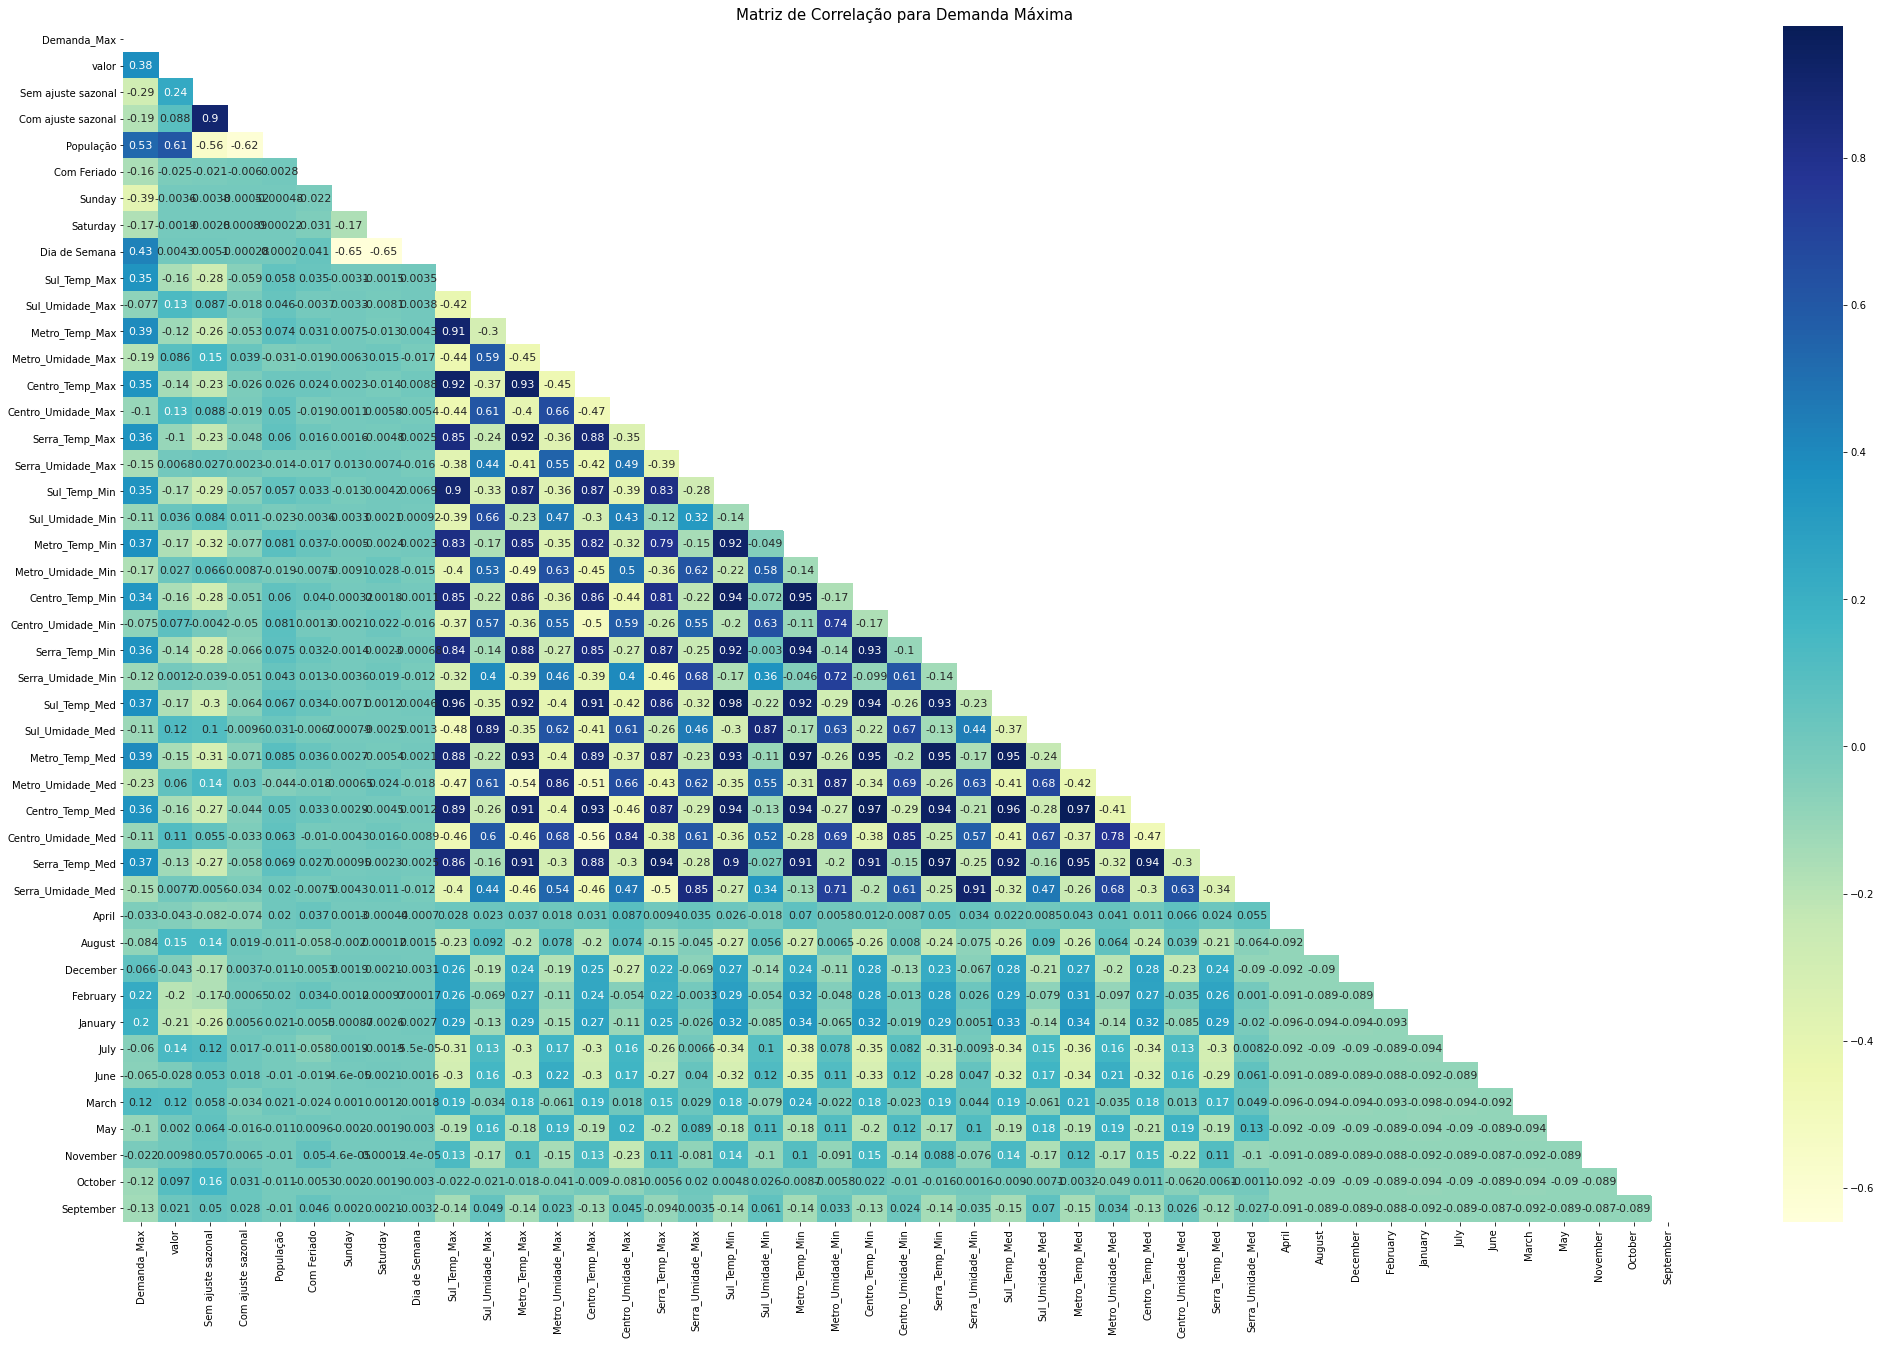

In [65]:
ax = plt.figure(figsize=(35,22));
corr5 = df_cor_5.corr()
mask = np.triu(np.ones_like(corr5, dtype=np.bool))
ax = sns.heatmap(corr5, mask = mask, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação para Demanda Máxima', fontsize=15);

In [66]:
df_cor_6 = df_4[['Demanda_Min', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal','População', 'Com Feriado', 'Sunday', 'Saturday', 'Dia de Semana',
            'Sul_Temp_Max', 'Sul_Umidade_Max', 'Metro_Temp_Max', 'Metro_Umidade_Max', 'Centro_Temp_Max', 'Centro_Umidade_Max',
                 'Serra_Temp_Max', 'Serra_Umidade_Max',
         'Sul_Temp_Min',
       'Sul_Umidade_Min', 'Metro_Temp_Min', 'Metro_Umidade_Min',
       'Centro_Temp_Min', 'Centro_Umidade_Min', 'Serra_Temp_Min',
       'Serra_Umidade_Min','Sul_Temp_Med', 'Sul_Umidade_Med',
       'Metro_Temp_Med', 'Metro_Umidade_Med', 'Centro_Temp_Med',
       'Centro_Umidade_Med', 'Serra_Temp_Med', 'Serra_Umidade_Med', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September']]

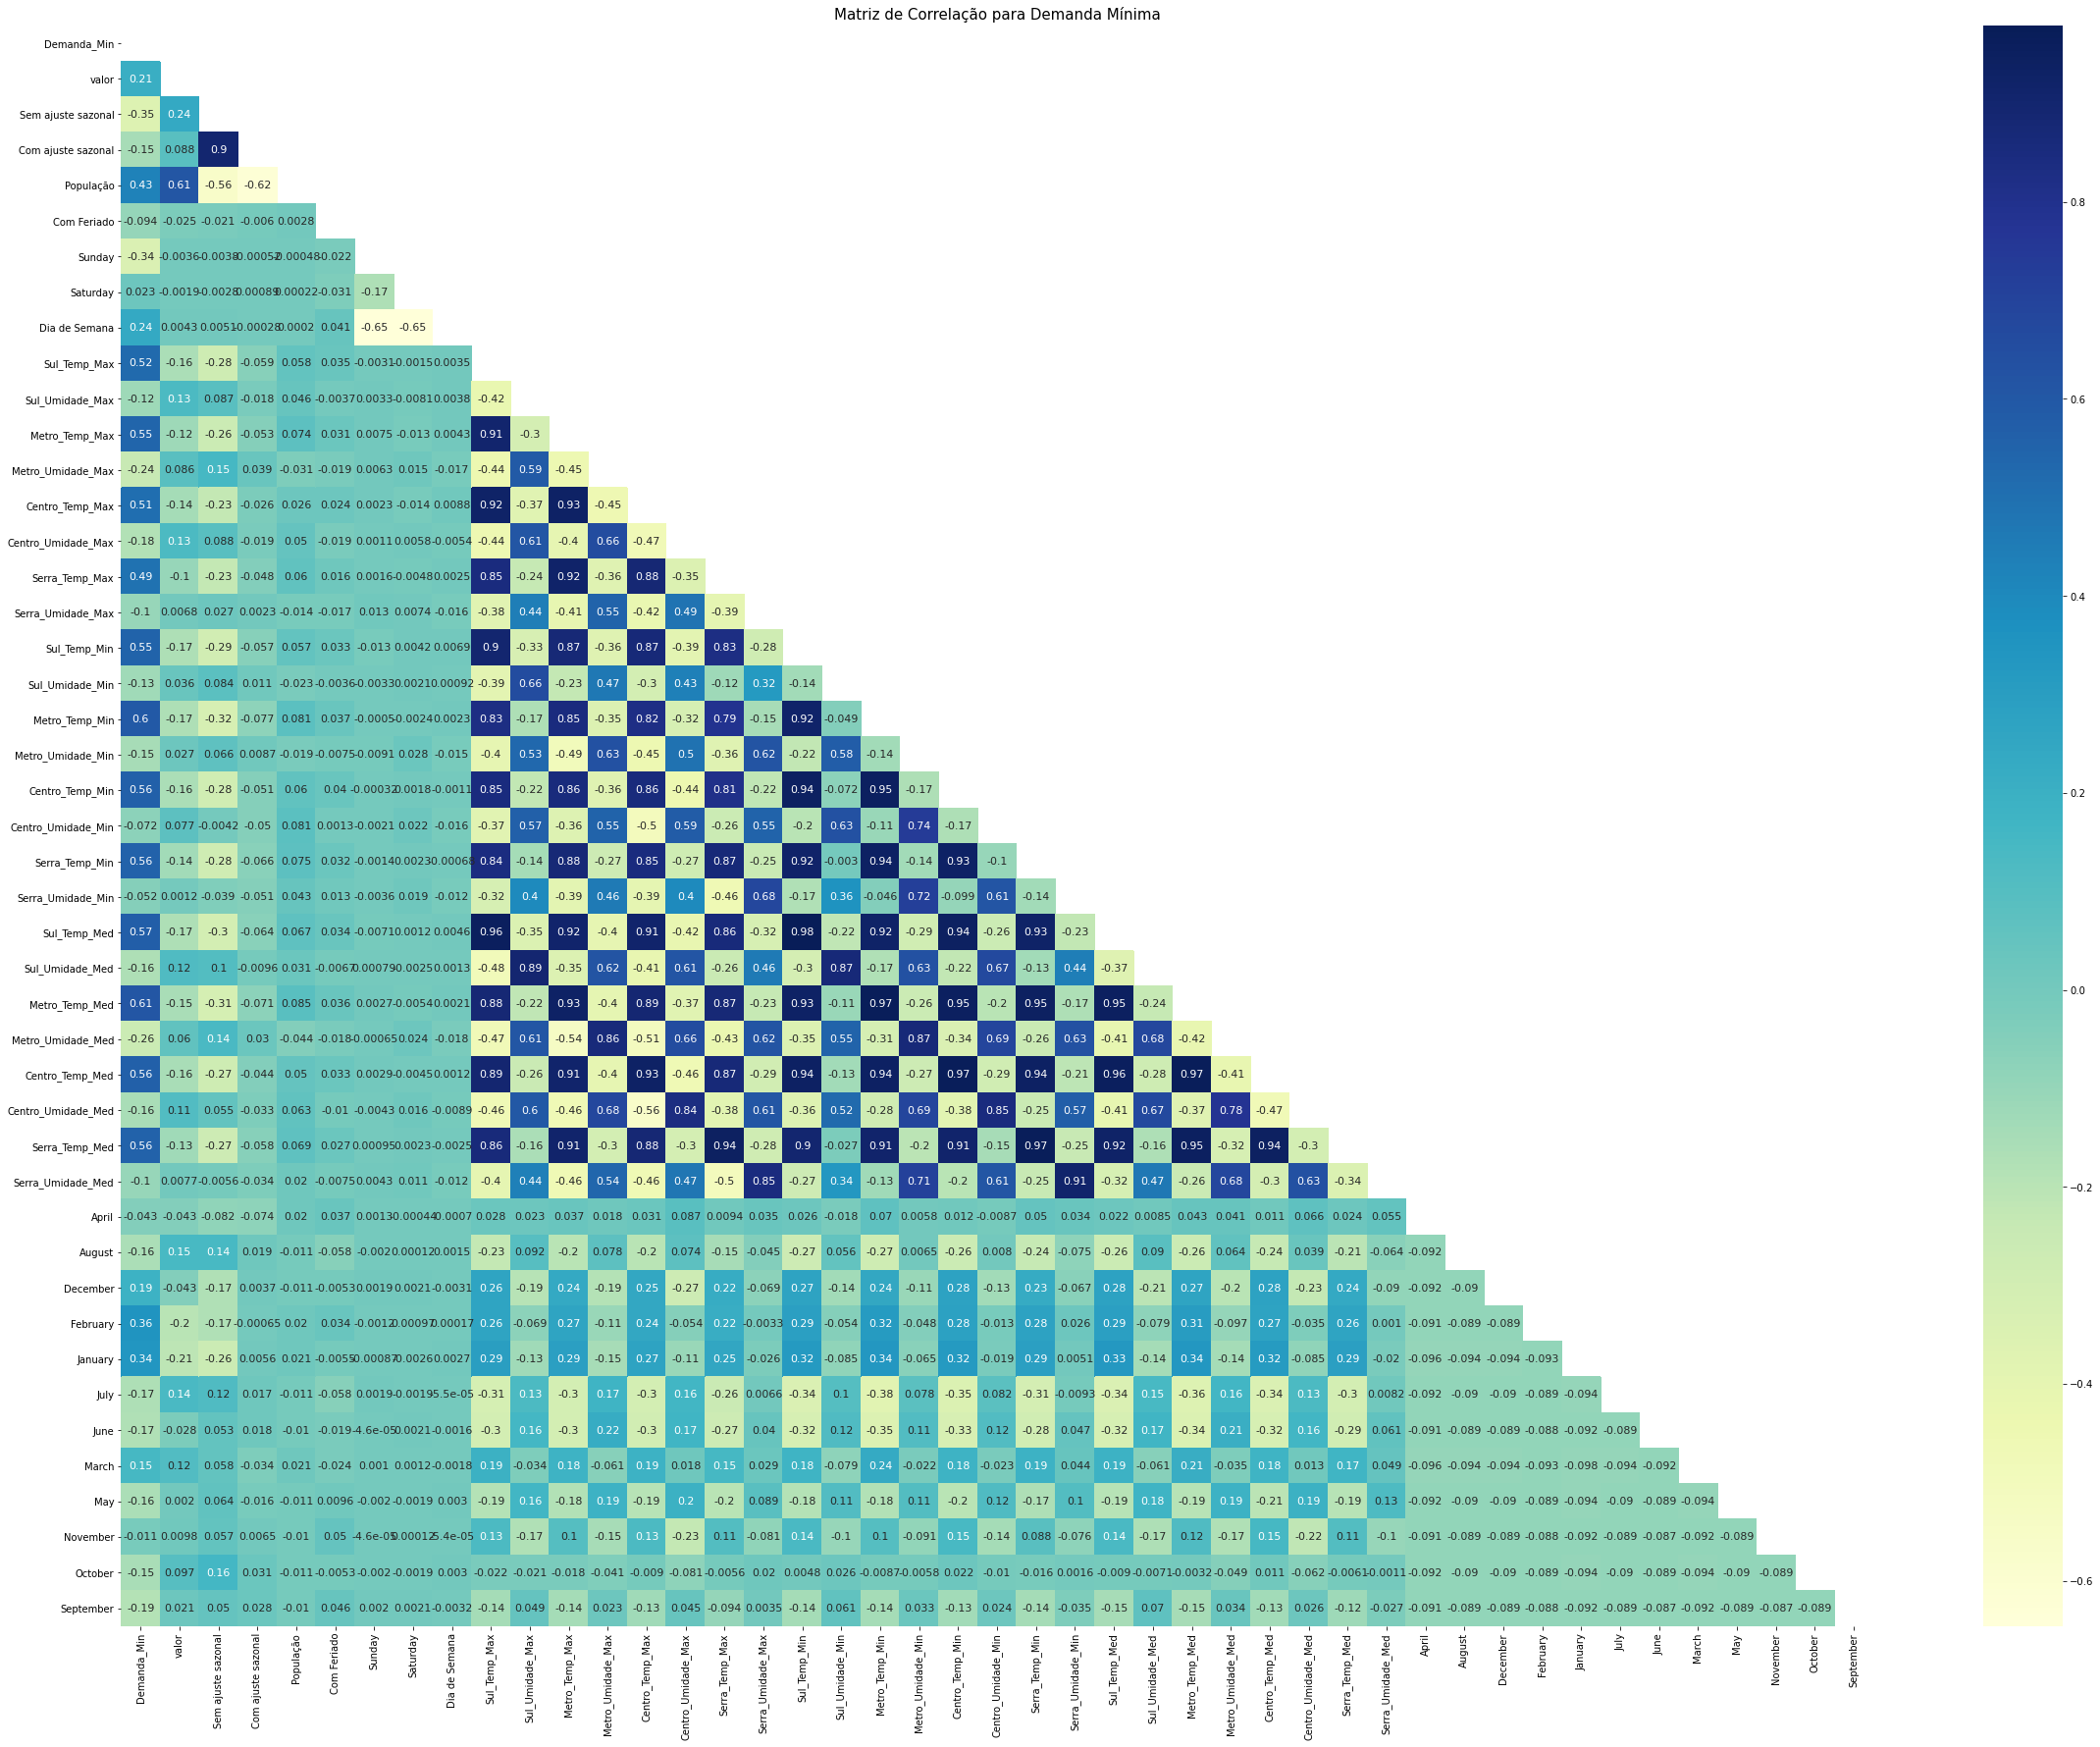

In [67]:
ax = plt.figure(figsize=(40,30));
corr6 = df_cor_6.corr()
mask = np.triu(np.ones_like(corr6, dtype=np.bool))
ax = sns.heatmap(corr6, mask = mask, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação para Demanda Mínima', fontsize=15);

In [68]:
df_cor_7 = df_4[['Demanda_Med', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal','População', 'Com Feriado', 'Sunday', 'Saturday', 'Dia de Semana',
            'Sul_Temp_Max', 'Sul_Umidade_Max', 'Metro_Temp_Max', 'Metro_Umidade_Max', 'Centro_Temp_Max', 'Centro_Umidade_Max',
                 'Serra_Temp_Max', 'Serra_Umidade_Max',
         'Sul_Temp_Min',
       'Sul_Umidade_Min', 'Metro_Temp_Min', 'Metro_Umidade_Min',
       'Centro_Temp_Min', 'Centro_Umidade_Min', 'Serra_Temp_Min',
       'Serra_Umidade_Min','Sul_Temp_Med', 'Sul_Umidade_Med',
       'Metro_Temp_Med', 'Metro_Umidade_Med', 'Centro_Temp_Med',
       'Centro_Umidade_Med', 'Serra_Temp_Med', 'Serra_Umidade_Med','April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September']]

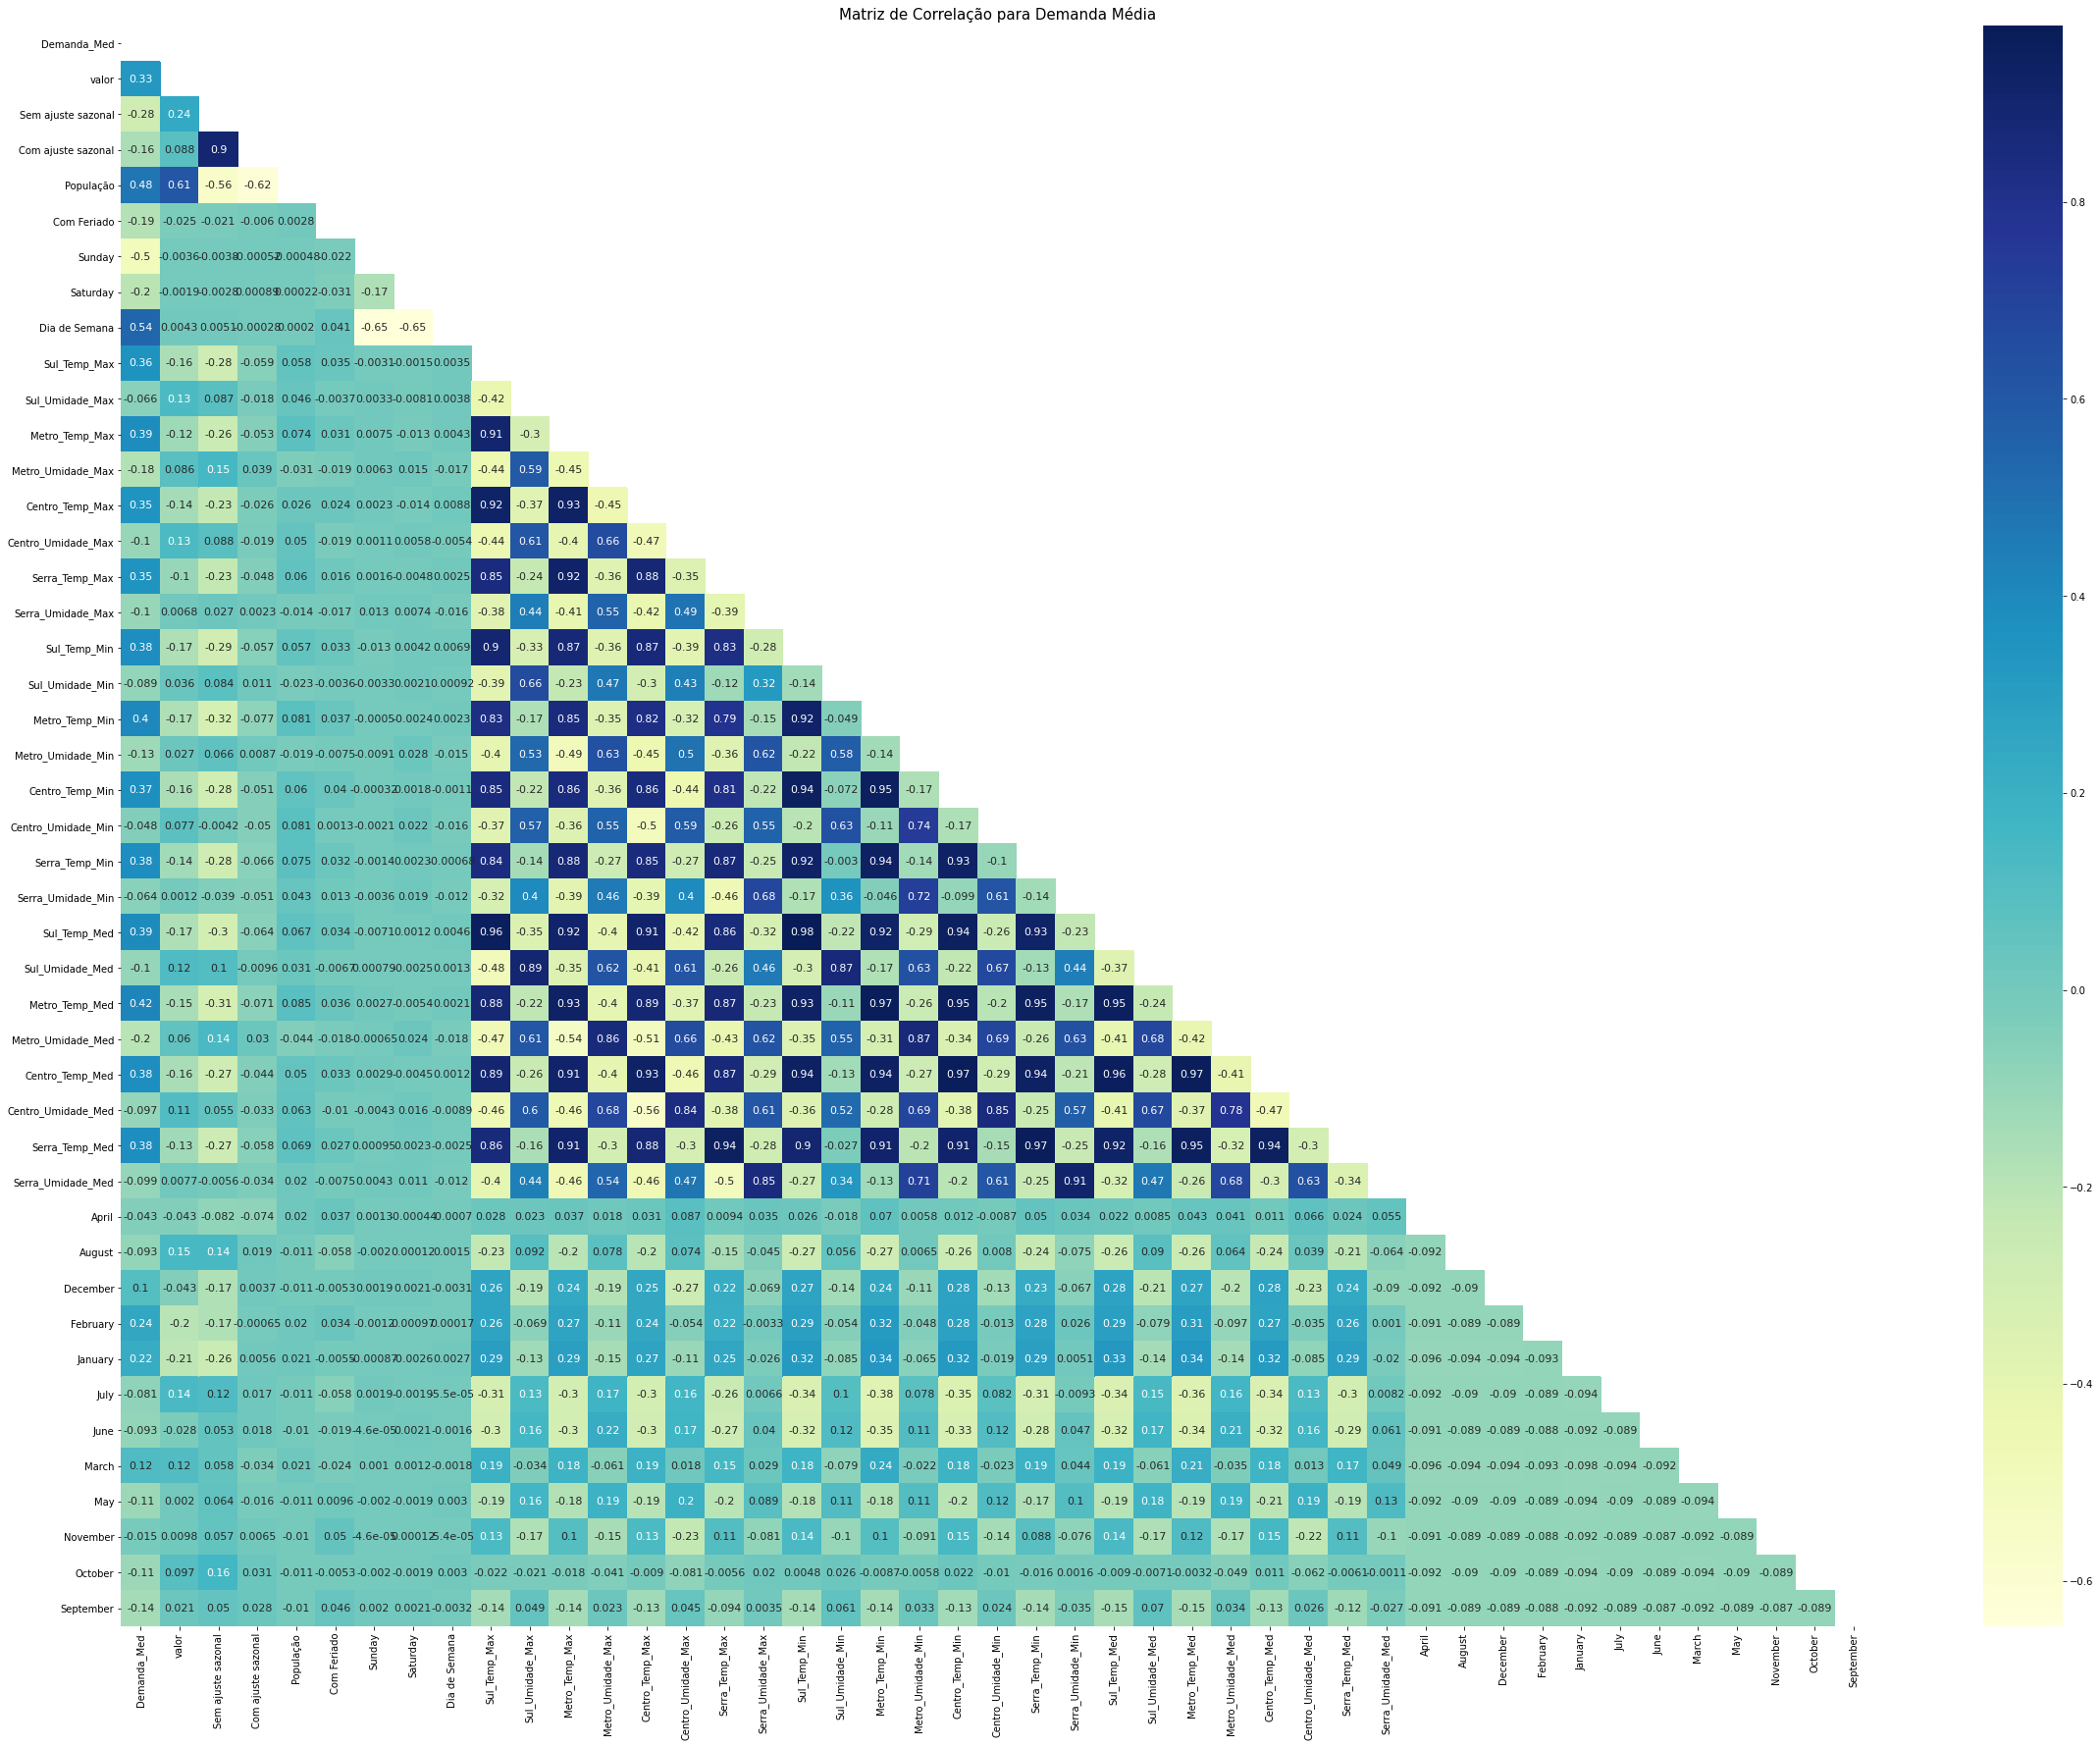

In [69]:
ax = plt.figure(figsize=(40,30));
corr7= df_cor_7.corr()
mask = np.triu(np.ones_like(corr7, dtype=np.bool))
ax = sns.heatmap(corr7, mask = mask, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação para Demanda Média', fontsize=15);

### Fazer a mesma coisa com o df_3

In [70]:
df_3.columns

Index(['Data', 'Demanda', 'Horário', 'Dia da Semana', 'valor',
       'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 'Feriado',
       'Ano', 'Turno', 'Com Feriado', 'Saturday', 'Sunday', 'Dia de Semana',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Média Temperatura',
       'Média Umidade'],
      dtype='object')

In [71]:
df_3_grouped_by_date_max = df_3.groupby('Data')['Demanda','valor', 'Sem ajuste sazonal', 'Com ajuste sazonal', 'População', 
                                                'Com Feriado','Sunday','Saturday','Dia de Semana', 'Média Temperatura',
                                               'Média Umidade','April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'].agg(['max']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [72]:
df_3_grouped_by_date_min = df_3.groupby('Data')['Demanda','Média Temperatura','Média Umidade'].agg(['min']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [73]:
df_3_grouped_by_date_mean = df_3.groupby('Data')['Demanda','Média Temperatura','Média Umidade'].agg(['mean']).reset_index() 

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [74]:
df_3_grouped_by_date_max.columns = df_3_grouped_by_date_max.columns.get_level_values(0)
df_3_grouped_by_date_min.columns = df_3_grouped_by_date_min.columns.get_level_values(0)
df_3_grouped_by_date_mean.columns = df_3_grouped_by_date_mean.columns.get_level_values(0)

In [75]:
df_3_grouped_by_date_max.columns

Index(['Data', 'Demanda', 'valor', 'Sem ajuste sazonal', 'Com ajuste sazonal',
       'População', 'Com Feriado', 'Sunday', 'Saturday', 'Dia de Semana',
       'Média Temperatura', 'Média Umidade', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [76]:
df_3_grouped_by_date_max.rename(columns={"Demanda": "Demanda_Max", 'Média Temperatura': 'Temperatura_Max',
                                        'Média Umidade': 'Umidade_Max'}, inplace=True)

In [77]:
df_3_grouped_by_date_min.rename(columns={"Demanda": "Demanda_Min", 'Média Temperatura': 'Temperatura_Min',
                                        'Média Umidade': 'Umidade_Min'}, inplace=True)

In [78]:
df_3_grouped_by_date_mean.rename(columns={"Demanda": "Demanda_Med", 'Média Temperatura': 'Temperatura_Med',
                                        'Média Umidade': 'Umidade_Med'}, inplace=True)

In [79]:
df_5 = df_3_grouped_by_date_max.merge(df_3_grouped_by_date_min, how='left', on = ['Data'])

In [80]:
df_5 = df_5.merge(df_3_grouped_by_date_mean, how='left', on = ['Data'])

In [81]:
df_5.head()

,Data,Demanda_Max,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Com Feriado,Sunday,Saturday,Dia de Semana,Temperatura_Max,Umidade_Max,April,August,December,February,January,July,June,March,May,November,October,September,Demanda_Min,Temperatura_Min,Umidade_Min,Demanda_Med,Temperatura_Med,Umidade_Med
0,2006-01-01,3302.0,108.55,91.702366,98.900273,10530809,1,1,0,0,27.300,90.500000,0,0,0,0,1,0,0,0,0,0,0,0,1806.0,20.925000,65.75,2277.530556,23.495903,79.253646
1,2006-01-02,3631.0,108.55,91.702366,98.900273,10530809,0,0,0,1,27.450,87.500000,0,0,0,0,1,0,0,0,0,0,0,0,2274.0,21.725000,65.00,3045.465278,23.818993,79.031337
2,2006-01-03,3761.0,108.55,91.702366,98.900273,10530809,0,0,0,1,26.600,82.689583,0,0,0,0,1,0,0,0,0,0,0,0,2560.0,20.716389,61.00,3213.102778,23.469557,74.780208
3,2006-01-04,3856.0,108.55,91.702366,98.900273,10530809,0,0,0,1,28.875,82.750000,0,0,0,0,1,0,0,0,0,0,0,0,2549.0,20.700000,49.75,3256.781944,23.830365,68.286285
4,2006-01-05,3910.0,108.55,91.702366,98.900273,10530809,0,0,0,1,28.250,73.500000,0,0,0,0,1,0,0,0,0,0,0,0,2649.0,22.166944,54.25,3314.315900,23.972667,67.117089


In [82]:
df_5.columns

Index(['Data', 'Demanda_Max', 'valor', 'Sem ajuste sazonal',
       'Com ajuste sazonal', 'População', 'Com Feriado', 'Sunday', 'Saturday',
       'Dia de Semana', 'Temperatura_Max', 'Umidade_Max', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Demanda_Min', 'Temperatura_Min',
       'Umidade_Min', 'Demanda_Med', 'Temperatura_Med', 'Umidade_Med'],
      dtype='object')

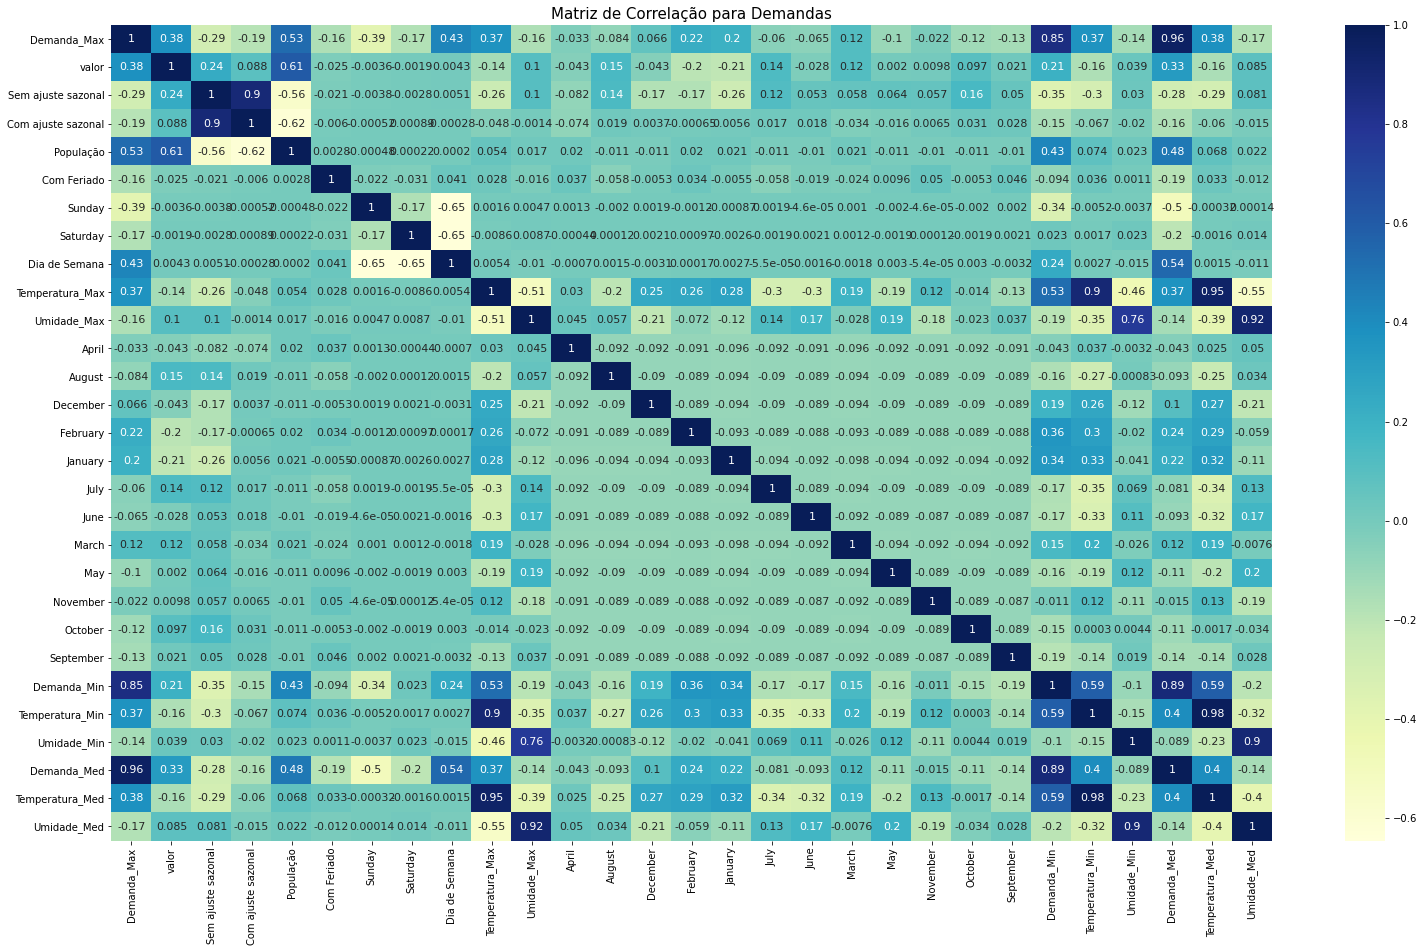

In [83]:
ax = plt.figure(figsize=(26,15));
corr8 = df_5.corr()
#mask = np.triu(np.ones_like(corr8, dtype=np.bool))
ax = sns.heatmap(corr8, annot=True, cmap="YlGnBu", annot_kws={"size": 11}, fmt='.2g')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Matriz de Correlação para Demandas', fontsize=15);

***Criar um dataframe com os dados médios de clima por turno Tentar FAZER!!***

### Fazer PCA nos dados

In [84]:
df_3.head()

,Data,Demanda,Horário,Dia da Semana,valor,Sem ajuste sazonal,Com ajuste sazonal,População,Feriado,Ano,Turno,Com Feriado,Saturday,Sunday,Dia de Semana,April,August,December,February,January,July,June,March,May,November,October,September,Média Temperatura,Média Umidade
0,2006-01-01,2588.0,00:00:00,6,108.55,91.702366,98.900273,10530809,Confraternização Universal,2006,Madrugada,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,20.925000,90.500000
1,2006-01-01,2584.0,00:01:00,6,108.55,91.702366,98.900273,10530809,Confraternização Universal,2006,Madrugada,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,20.927326,90.486111
2,2006-01-01,2578.0,00:02:00,6,108.55,91.702366,98.900273,10530809,Confraternização Universal,2006,Madrugada,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,20.929653,90.472222
3,2006-01-01,2580.0,00:03:00,6,108.55,91.702366,98.900273,10530809,Confraternização Universal,2006,Madrugada,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,20.931979,90.458333
4,2006-01-01,2578.0,00:04:00,6,108.55,91.702366,98.900273,10530809,Confraternização Universal,2006,Madrugada,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,20.934306,90.444444


In [85]:
df_3_data_turno = df_3.groupby(['Data','Turno'])['Média Temperatura','Média Umidade'].agg(['max','min','mean']).reset_index()

C:\Users\camil\Anaconda3\envs\Trabalho_Pos\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [86]:
df_3_data_turno.head()

Data      Turno Média Temperatura                       Média Umidade  \
                                      max        min       mean           max   
0 2006-01-01  Madrugada         21.762500  20.925000  21.343750     90.500000   
1 2006-01-01      Manhã         22.600000  21.764826  22.182413     85.486111   
2 2006-01-01      Noite         27.290069  23.734931  25.512500     79.960417   
3 2006-01-01      Tarde         27.300000  22.613056  24.956528     80.459028   
4 2006-01-02  Madrugada         23.725000  22.725000  23.225000     83.750000   

                         
         min       mean  
0  85.500000  88.000000  
1  80.500000  82.993056  
2  65.789583  72.875000  
3  65.750000  73.104514  
4  80.000000  81.875000

In [87]:
df_4.to_parquet('df_4.parquet.gzip',
              compression='gzip')  

In [88]:
df_5.to_parquet('df_5.parquet.gzip',
              compression='gzip')  